In [1]:
import pandas as pd
from faker import Faker
import pandas as pd
import random
from random import randint
import kaggle

fake = Faker()

# seraching from web 


In [2]:
def generate_custom_data(num_rows):
    data = {
        "DATE": pd.date_range(start='1/1/2021', periods=num_rows, freq='D'),
        "ITEM CODE": [f'{randint(100000, 999999)}' for _ in range(num_rows)],  # 6-digit item codes
        "actual sales": [randint(1, 1000) for _ in range(num_rows)]
    }
    return pd.DataFrame(data)
    

def search_and_download_datasets():
    search_term = input("Enter your search term (e.g., medical equipment sales): ")
    
    # Searching for datasets on Kaggle
    search_result = kaggle.api.dataset_list(search=search_term)
    
    if search_result:
        print("Datasets found:")
        i=0
        j=0
        for i, dataset in enumerate(search_result[:5]):  # Display first 5 datasets found
            print(f"{i+1}. {dataset.ref} - {dataset.title}")
            i=i+1
        
        j=i+1
        print(f"{j}. Download a custom dataset ")
            
        choice=input("Which dataset you want to download(enter the number)")
        choice =int(choice)
        
        if choice == j:
            fake_df= generate_custom_data(100)
            fake_df.to_csv('C:/Users/proshan/OneDrive - SymphonyAI RETAIL CPG/Desktop/Projects/csv dataset generator/Downloads/dataset.csv', index=False)     
            print("Custom dataset saved")
        else:

            dataset_to_download = search_result[choice-1].ref  
            kaggle.api.dataset_download_files(dataset_to_download, path='Downloads', unzip=True)
            print(f"Downloaded {dataset_to_download}")
#             # Example: Download the first dataset found (be mindful of the dataset size and terms)
    else:
        print("No datasets found. Try refining your search term.")
        print("Generaing a custom dataset")
        fake_df2= generate_custom_data(100)
        fake_df2.to_csv('C:/Users/proshan/OneDrive - SymphonyAI RETAIL CPG/Desktop/Projects/csv dataset generator/Downloads/dataset.csv', index=False)     
        print("dataset saved")

if __name__ == "__main__":
    search_and_download_datasets()

Enter your search term (e.g., medical equipment sales): furniture sales
Datasets found:
1. zahraaalaatageldein/sales-for-furniture-store - Sales for Furniture Store
2. tanayatipre/store-sales-forecasting-dataset - Store Sales Forecasting Dataset
3. dmaillie/international-furniture-part-sales - International Furniture Part Sales
4. fekihmea/sales-store-overview - Sales Store overview
5. ahmedkallam/ikea-sa-furniture-web-scraping - IKEA Furniture
6. Download a custom dataset 
Which dataset you want to download(enter the number)1
Dataset URL: https://www.kaggle.com/datasets/zahraaalaatageldein/sales-for-furniture-store
Downloaded zahraaalaatageldein/sales-for-furniture-store


# handling multiple files

In [3]:
import os
import glob
import pandas as pd  # Make sure to import pandas

# Define a placeholder for the generate_custom_data function if it's not defined
# You should replace this with your actual function definition
def generate_custom_data(n):
    print(f"Generating a custom dataset with {n} entries.")

downloads_folder = 'C:/Users/proshan/OneDrive - SymphonyAI RETAIL CPG/Desktop/Projects/csv dataset generator/Downloads'
output_file_path = os.path.join(downloads_folder, "output.csv")  # It's good to specify the complete path including the file name for clarity

files = glob.glob(os.path.join(downloads_folder, '*'))
files = [f for f in files if os.path.isfile(f)]

if len(files) == 0:
    print("The folder is empty.")
    generate_custom_data(100)
elif len(files) == 1:
    print("There is a single file in the folder.")
else:
    print(f"There are {len(files)} files in the folder.")
    all_files = glob.glob(os.path.join(downloads_folder, "*.csv"))

    li = []

    try:
        for filename in all_files:
            df = pd.read_csv(filename, index_col=None, header=0, sep=';')
            li.append(df)

        frame = pd.concat(li, axis=0, ignore_index=True)
        # Assuming you want to save the concatenated DataFrame to a file
        frame.to_csv(output_file_path, index=False, sep=';')
        print(f"All files have been concatenated into {output_file_path}.")
    except Exception as e:
        print("There are multiple datasets which cannot be concatenated into one due to the following error:", e)
        print("Generating custom dataset.")
        df=generate_custom_data(100)

There is a single file in the folder.


# renaming to test.csv

In [4]:
# import os
# import shutil

# # Path to the Downloads directory where the file to rename is located
# downloads_path = 'C:/Users/proshan/OneDrive - SymphonyAI RETAIL CPG/Desktop/Projects/csv dataset generator/Downloads'

# # List all files in the Downloads directory
# downloaded_files = os.listdir(downloads_path)

# # Assuming there is only one file in the directory or you're only interested in the first .csv file
# for file in downloaded_files:
#     if file.endswith('.csv'):
#         original_file_path = os.path.join(downloads_path, file)
#         new_file_name = 'test.csv'
#         new_file_path = os.path.join(downloads_path, new_file_name)
#         try:
#             # Rename the file
#             os.rename(original_file_path, new_file_path)
#             print(f"File {file} has been renamed to {new_file_name}")
#             break  # If the renaming is done, exit the loop
#         except FileNotFoundError:
#             print(f"The file {original_file_path} does not exist.")
#         except Exception as e:
#             print(f"An error occurred: {e}")
#         break  # Exit the loop after trying to rename the first .csv file found
# else:
#     # If no .csv files were found in the loop
#     print("No .csv files found in the directory.")

import os

# Path to the Downloads directory where the files to rename are located
downloads_path = 'C:/Users/proshan/OneDrive - SymphonyAI RETAIL CPG/Desktop/Projects/csv dataset generator/Downloads'

# List all files in the Downloads directory
downloaded_files = os.listdir(downloads_path)

# New file names we want to use if they're not already taken
new_csv_file_name = 'test.csv'
new_excel_file_name = 'test.xlsx'

# Paths to the new files
new_csv_file_path = os.path.join(downloads_path, new_csv_file_name)
new_excel_file_path = os.path.join(downloads_path, new_excel_file_name)

# Check if 'test.csv' already exists
if os.path.exists(new_csv_file_path):
    print(f"A file named {new_csv_file_name} already exists.")
else:
    # Rename the first .csv file found
    for file in downloaded_files:
        if file.endswith('.csv'):
            original_file_path = os.path.join(downloads_path, file)
            try:
                os.rename(original_file_path, new_csv_file_path)
                print(f"File {file} has been renamed to {new_csv_file_name}")
                break
            except FileNotFoundError:
                print(f"The file {original_file_path} does not exist.")
            except Exception as e:
                print(f"An error occurred: {e}")
            break

# Now check if 'test.xlsx' already exists
if os.path.exists(new_excel_file_path):
    print(f"A file named {new_excel_file_name} already exists.")
else:
    # Rename the first .xls or .xlsx file found
    for file in downloaded_files:
        if file.endswith('.xls') or file.endswith('.xlsx'):
            original_file_path = os.path.join(downloads_path, file)
            try:
                os.rename(original_file_path, new_excel_file_path)
                print(f"File {file} has been renamed to {new_excel_file_name}")
                break
            except FileNotFoundError:
                print(f"The file {original_file_path} does not exist.")
            except Exception as e:
                print(f"An error occurred: {e}")
            break

File Super_Store_data.csv has been renamed to test.csv


# Reading the file it can be csv or excel file

In [5]:
def generate_custom_data(num_rows):
    data = {
        "DATE": pd.date_range(start='1/1/2021', periods=num_rows, freq='D'),
        "ITEM CODE": [f'{randint(100000, 999999)}' for _ in range(num_rows)],  # 6-digit item codes
        "actual sales": [randint(1, 1000) for _ in range(num_rows)]
    }
    return pd.DataFrame(data)

# Define the path to the folder containing the files
folder_path = 'C:/Users/proshan/OneDrive - SymphonyAI RETAIL CPG/Desktop/Projects/csv dataset generator/Downloads'

# Define your custom function here (or make sure it's imported if defined elsewhere)


# Get the list of files in the folder
files = os.listdir(folder_path)

# Check each file's extension and read it accordingly
for file in files:
    try:  # Use a try block to catch any kind of error
        file_path = os.path.join(folder_path, file)
        if file.endswith('.csv'):
            try:
                df = pd.read_csv(file_path, encoding='utf-8')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='latin1')
            # Do something with the CSV file
        elif file.endswith('.xlsx'):
            df = pd.read_excel(file_path)
            # Do something with the Excel file
        else:
            print(f"Unsupported file format: {file}")
            print("Reading the test file which is generated")
    except Exception as e:  # Catch any other exception that occurs
        print(f"Reading the csv file generated")
        df=generate_custom_data(100)  # Call your custom error-handling function

In [6]:


df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [7]:
# if 'sales' in df.columns and 'price' in df.columns:
#     df=df.drop('price',axis=1)
# df.head()

# nlp tokkenisation to find the column called sales

In [8]:
import pandas as pd
import nltk
from nltk.corpus import wordnet

# Ensure you have the necessary nltk datasets downloaded
# nltk.download('wordnet')
# nltk.download('omw-1.4')


In [9]:
from nltk.corpus import wordnet
import re

def find_synonyms(words):
    synonyms = set()
    for word in words:
        for syn in wordnet.synsets(word):
            for lemma in syn.lemmas():
                # Add synonyms, replacing underscores with spaces
                synonyms.add(lemma.name().replace('_', ' '))
    return synonyms

# Find synonyms of "sale" and "price"
words_to_find_synonyms_for = ["sale", "price"]
combined_synonyms = find_synonyms(words_to_find_synonyms_for)

# Ensure 'sales' is included in the synonyms
combined_synonyms.add('sales')

def is_related(column_name):
    # Define patterns to exclude specific column names
    excluded_patterns = [
        '^retail.*',  # Starts with 'retail'
        '^wholesale.*',  # Starts with 'wholesale'
        '.*_price$',  # Ends with '_price'
        # Additional patterns can be added as needed
    ]

    # Convert column name to lowercase and replace underscores with spaces
    column_name = column_name.lower().replace('_', ' ')

    # Check for excluded patterns first
    for pattern in excluded_patterns:
        if re.match(pattern, column_name):
            return False

    # Check if the column name contains terms or synonyms related to "sale" or "price"
    related_terms = ['sale', 'sales', 'price', 'amount'] + list(combined_synonyms)
    if any(term in column_name for term in related_terms):
        return True

    return False

# Prepare the dictionary for renaming columns based on the related criteria
columns_to_rename = {}
for col in df.columns:
    if is_related(col):
        columns_to_rename[col] = 'actual sales'

# Rename columns in the DataFrame as per the dictionary
df.rename(columns=columns_to_rename, inplace=True)

# Assuming you want to see the first few rows of the modified DataFrame
# print(df.head())
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,actual sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


# currency conversion to INR

In [10]:
if 'actual sales' in df.columns:
    
    first_value = str(df['actual sales'].iloc[0])
    if first_value.startswith('$'):
        exchange_rate = 75  # Define the exchange rate from USD to INR

        def dollars_to_rupees(value):
            # This function checks if a value is a dollar amount and converts it to rupees.
            if isinstance(value, str) and value.startswith('$'):
                # Remove the dollar sign and commas, then convert to float
                numeric_value = float(value.replace('$', '').replace(',', ''))
                # Convert the dollar amount to rupees
                return numeric_value * exchange_rate
            elif isinstance(value, str):
                # If value is a string but not in dollars, just remove commas
                value_no_commas = value.replace(',', '') 
                return float(value_no_commas)
            else:
                # If value is already a number, return it as is.
                return value

        # Apply the function to the 'actual sales' column for conversion
        df['actual sales'] = df['actual sales'].apply(dollars_to_rupees)

    

In [11]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,actual sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


# After NLP tokkenisation if there is no column with the name actual sales then generate a custom dataset with actual sales column

In [12]:
def generate_custom_data(num_rows):
    data = {
        "DATE": pd.date_range(start='1/1/2021', periods=num_rows, freq='D'),
        "ITEM CODE": [f'{randint(100000, 999999)}' for _ in range(num_rows)],  # 6-digit item codes
        "actual sales": [randint(1, 1000) for _ in range(num_rows)]
    }
    return pd.DataFrame(data)

if 'actual sales' not in df.columns:
    # Column not found, so we generate a new dataframe
    df = generate_custom_data(100)
    
    # Remove the original test.csv file
#     file_path = 'C:/Users/proshan/OneDrive - SymphonyAI RETAIL CPG/Desktop/Projects/csv dataset generator/Downloads/test.csv'
#     os.remove(file_path)
    
#     # Save the newly generated dataframe as test.csv in the same location
#     df.to_csv(file_path, index=False)  # index=False to avoid saving the index column
    
#     print("Original file removed and new data saved as test.csv.")
# else:
#     print("Column 'actual sales' exists in the dataframe.")

In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,actual sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [14]:
# print(type(df.iloc[0,14]))

In [15]:
# # count = 0
# # for column_name in df.columns:
# #     if column_name=='actual sales':
# #         var=type(df.iloc[0,count])
# #         if var == str:
# #             df.drop(df.columns[count],axis=1,inplace=True)

# # #             df.rename(columns={df.columns[count]: 'actaul sales2'}, inplace=True)
# #             print(var)
# #             print("the column is ",count)
# #             print("yes the column is deleted")
# #         count=count+1
# #     else:
# #         count=count+1

# # Create a DataFrame, transposing it to make duplicate handling easier
# df2 = pd.DataFrame(df).T

# # Fix duplicate columns by appending an index to duplicates
# df2.columns = pd.Index(df2.columns)
# new_columns = {}
# for col in df2.columns:
#     if col in new_columns:
#         new_columns[col] += 1
#         col_new = f"{col}_{new_columns[col]}"
#     else:
#         new_columns[col] = 0
#         col_new = col
#     df2.rename(columns={col: col_new}, inplace=True)

# df = df2.T  # Transpose the DataFrame back to its original form

# # Now look for the 'actual sales' columns
# columns_to_check = [col for col in df.columns if 'actual sales' in col]

# # Loop through these columns and drop the one where the first item is not a number
# for column_name in columns_to_check:
#     print(column_name, ":", df[column_name].iloc[0])
    
#     # Check if the first item in the column is not a number
#     if not isinstance(df[column_name].iloc[0], (int, float)):
#         df.drop(column_name, axis=1, inplace=True)  # Drop the column
#         print("Dropped column:", column_name)



In [16]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,actual sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


#  Deleting the extra columns is generated

In [17]:
def generate_custom_data(num_rows):
    data = {
        "DATE": pd.date_range(start='1/1/2021', periods=num_rows, freq='D'),
        "ITEM CODE": [f'{randint(100000, 999999)}' for _ in range(num_rows)],  # 6-digit item codes
        "actual sales": [randint(1, 1000) for _ in range(num_rows)]
    }
    return pd.DataFrame(data)
# Step 1

# Step 2
if 'actual sales' not in df.columns:
    generate_custom_data(100)
else:
    # Find the index of the first occurrence of "actual_sales" column
    first_actual_sales_index = df.columns.get_loc("actual sales")

# Convert the index to a list
    index_list = df.columns.tolist()

# Filter out all columns after the first occurrence of "actual_sales"
    df = df.iloc[:, :index_list.index("actual sales")+1]

# Print the updated dataframe
#     df.head()
   

In [18]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,actual sales
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840


# generating forecasted column

In [19]:
# Creating a sample DataFrame with a column 'actual sales' for demonst
# df = pd.DataFrame(data)

def generate_custom_data_with_forecast(num_rows):
    data = {
        "DATE": pd.date_range(start='1/1/2021', periods=num_rows, freq='D'),
        "ITEM CODE": [f'{randint(100000, 999999)}' for _ in range(num_rows)],  # 6-digit item codes
        "actual sales": [randint(1, 1000) for _ in range(num_rows)],
        "forecasted sales":[randint(1, 1000) for _ in range(num_rows)]
    }
    return pd.DataFrame(data)
try:
    
    import numpy as np
    import pandas as pd # Assuming you're using pandas for DataFrame operations

    # Generating 'forecast sales' with the same number of digits as 'actual sales' (ignoring decimals)
    def forecast_sales(number):
        if pd.isnull(number):  # Check if the number is NaN
            return np.nan  # Return NaN if the input is NaN

        int_part = int(round(number))  # Convert number to int while properly handling floats
        num_digits = len(str(int_part))  # Get the number of digits in the integer part

        if num_digits == 1:
            return np.random.randint(0, 10)

        random_number_str = str(np.random.randint(1, 10))  # Ensure the first digit is not zero
        for _ in range(num_digits - 1):
            random_number_str += str(np.random.randint(0, 10))

        return int(random_number_str)

    # Assuming df is your DataFrame and 'actual sales' is the column you're working with
    # You might need to ensure df is defined. For example:
    # df = pd.DataFrame({'actual sales': [123.45, 6789.01, np.nan, 23.0]})

    # Apply the forecast_sales function to each row in 'actual sales'
    df['forecasted sales'] = df['actual sales'].apply(forecast_sales)
except Exception as e:
    print("The actual sales is not in a suitable format")
    print("Generating a custom dataset with forecast")
    df=generate_custom_data_with_forecast(200)
    


In [20]:

df.dropna(inplace=True)
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,actual sales,forecasted sales
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,908
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,72
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,39
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,74
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,96


<!-- # Predicting the best formula by math -->

In [21]:
# import pandas as pd
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression
# import numpy as np


# # Define custom evaluation metrics
# def mean_absolute_percentage_error(y_true, y_pred):
#     return np.mean(np.abs(y_true - y_pred) / y_true) * 100

# def weighted_mean_absolute_percentage_error(y_true, y_pred):
#     return (np.sum(np.abs(y_pred-y_true)) / np.sum(y_true)) * 100

# def symmetric_mean_absolute_percentage_error(y_true, y_pred):
#     return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# def mean_absolute_error(y_true, y_pred):
#     return np.mean(abs(y_pred-y_true))

# def mean_squared_error(y_true, y_pred):
#     return np.mean(y_pred-y_true)**2
   
# def root_mean_squared_error(y_true, y_pred):
#     return np.sqrt(np.mean(y_pred-y_true)**2)

# # Assuming 'actual' and 'predicted' are the actual and predicted sales columns
# # # Load your dataframe here. For example, if you are loading from a csv file
# # df = pd.read_csv('C:/ALX/20240516_d10a7Horizon_dfai_day.csv',sep=';')

# y_actual = df['actual sales'].values
# y_predicted = df['forecasted sales'].values

# # Define evaluation metrics
# metrics = {
#     "MAE": mean_absolute_error,
#     "RMSE": root_mean_squared_error,
#     "MSE": mean_squared_error,
#     "MAPE": mean_absolute_percentage_error,
#     "WMAPE": weighted_mean_absolute_percentage_error,
#     "SMAPE": symmetric_mean_absolute_percentage_error,
# }

# # Calculate each metric and save the results
# results = {metric_name: metric_func(y_actual, y_predicted) for metric_name, metric_func in metrics.items()}

# print(results)

# # Find the best metric with the lowest performance value
# best_metric = min(results, key=results.get)

# print(f"Best metric is {best_metric} with a performance of {results[best_metric]}")


In [22]:
# import pandas as pd
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression
# import numpy as np


# # Define custom evaluation metrics
# def mean_absolute_percentage_error(y_true, y_pred):
#     return np.mean(np.abs(y_true - y_pred) / y_true) * 100

# def weighted_mean_absolute_percentage_error(y_true, y_pred):
#     return (np.sum(np.abs(y_pred-y_true)) / np.sum(y_true)) * 100

# def symmetric_mean_absolute_percentage_error(y_true, y_pred):
#     return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# def mean_absolute_error(y_true, y_pred):
#     return np.mean(abs(y_pred-y_true))

# def mean_squared_error(y_true, y_pred):
#     return np.mean(y_pred-y_true)**2
   
# def root_mean_squared_error(y_true, y_pred):
#     return np.sqrt(np.mean(y_pred-y_true)**2)

# # Assuming 'actual' and 'predicted' are the actual and predicted sales columns
# # # Load your dataframe here. For example, if you are loading from a csv file
# # df = pd.read_csv('C:/ALX/20240516_d10a7Horizon_dfai_day.csv',sep=';')

# y_actual = df['actual sales'].values
# y_predicted = df['forecasted sales'].values

# # Define evaluation metrics
# metrics = {
#     "MAE": mean_absolute_error,
#     "RMSE": root_mean_squared_error,
#     "MSE": mean_squared_error,
#     "MAPE": mean_absolute_percentage_error,
#     "WMAPE": weighted_mean_absolute_percentage_error,
#     "SMAPE": symmetric_mean_absolute_percentage_error,
# }

# # Calculate each metric and save the results
# results = {metric_name: metric_func(y_actual, y_predicted) for metric_name, metric_func in metrics.items()}

# print(results)

# # Find the best metric with the lowest performance value
# best_metric = min(results, key=results.get)

# print(f"Best metric is {best_metric} with a performance of {results[best_metric]}")


In [23]:
# df.head()

In [24]:
df['actual sales'] = df['actual sales'].astype(int) if df['actual sales'].dtype == float else df['actual sales']
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,actual sales,forecasted sales
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261,209
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731,658
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957,243
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48,89
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706,2153


#  Graph to detect the actual sales pattern

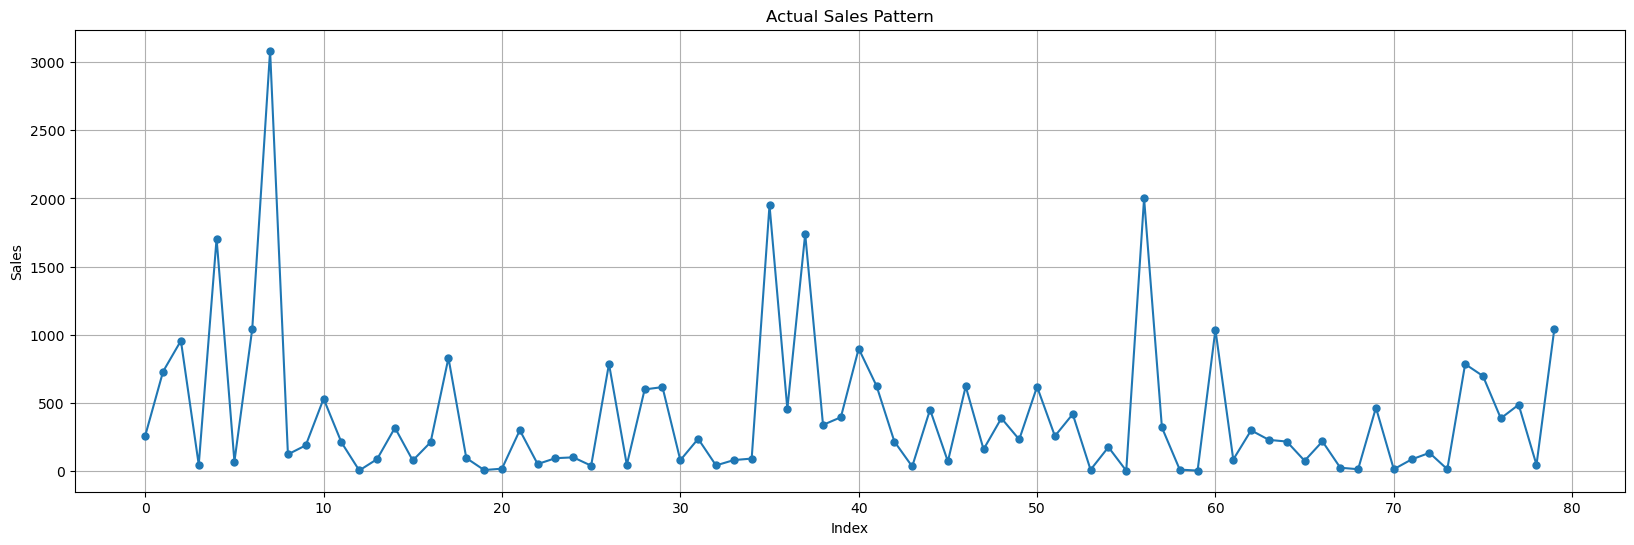

In [25]:
df2=df.head(80)
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))  # Adjust figure size as per your necessity
plt.plot(df2['actual sales'], marker='o', linestyle='-', markersize=5)
plt.title('Actual Sales Pattern')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Formula prediction

In [26]:
from scipy.signal import find_peaks

mean_sales = df['actual sales'].mean()
std_sales = df['actual sales'].std()
positive_threshold = mean_sales+(3 * std_sales)
negative_threshold = mean_sales-(3 * std_sales)
positive_outliers = df[(df['actual sales'] > positive_threshold)]
negative_outliers = df[(df['actual sales'] < negative_threshold)]

print(f"mean sales is",mean_sales)
print(f"standard deviation is ",std_sales)
print(f"positive threshold is ",positive_threshold)
print(f"negative threshold is",negative_threshold)

# print("positive outlier")
# print(positive_outliers)
# print("negative outlier")
# print(negative_outliers)
print("")
if negative_outliers.empty:
    if not positive_outliers.empty:
        metric = "WMAPE"
        print("The Best Metric is ")
        print(metric)
    else:
        print("The Best Metric is ")
        print("MAPE")
elif not negative_outliers.empty:
    if not positive_outliers.empty:
        print("The Best Metric is ")
        metric ="SMAPE"
        print(metric)


mean sales is 349.2668552569543
standard deviation is  503.1762918118
positive threshold is  1858.7957306923545
negative threshold is -1160.2620201784457

The Best Metric is 
WMAPE
